In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
path=r"C:\Users\王飘鸿\Desktop\机器学习\吴恩达作业\machine-learning-ex3\ex3"

In [3]:
path1=path+"\\ex3data1.mat"

In [363]:
X_1=loadmat(path1)["X"]

In [588]:
y_1=loadmat(path1)["y"]

In [18]:
#############随机展示手写图片

In [19]:
def init_data_plot(data):
    fig,ax_array=plt.subplots(nrows=10,ncols=10,figsize=(10,10),sharex=True,sharey=True)
    for i in range(10):
        for j in range(10):
            object_signature=np.random.randint(len(data))
            ax_array[i,j].matshow(np.array(data[object_signature].reshape((20,20))).T)

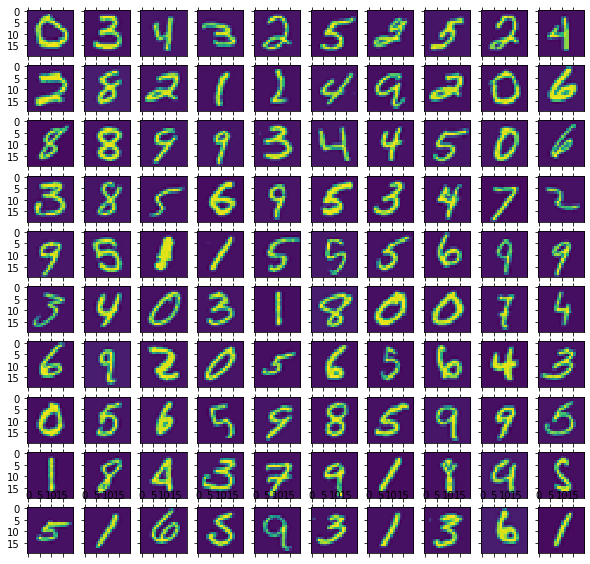

In [20]:
init_data_plot(data=X_1)

In [21]:
#####定义sigmoid函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [429]:
#######cost函数之前的逻辑回归作业实现了，直接使用
#######log函数里面总是有0出现，解决很麻烦

In [449]:
def  Calculate_cost(theta,X,y,learningRate=0):
    X = np.matrix(X)
    y = np.matrix(y).T
    theta = np.matrix(theta)
    first_mid=sigmoid(theta.dot(X.T))
    first_mid[np.where(first_mid==0)]=0.05
    second_mid=1-sigmoid(theta.dot(X.T))
    second_mid[np.where(second_mid==0)]=0.05
    left=-(y.T).dot(np.log((first_mid).T))
    right= -((1-y).T).dot(np.log((second_mid).T))
    return np.sum(left+right)/len(X)

In [244]:
#########梯度函数之前也实现了一次，直接使用

In [425]:
def calculate_gradient(theta,X,y,learning_rate=0.01):
    X = np.matrix(X)
    y = np.matrix(y).T
    theta = np.matrix(theta)
    mid=sigmoid(theta.dot(X.T)).T-y
    return learning_rate*((mid.T).dot(X))/(len(X))

In [246]:
########首先创建每个数值的模型

In [247]:
########首先对数据预处理

In [364]:
X_1=pd.DataFrame(X_1)

In [365]:
X_1.insert(0,"ones",np.ones(X_1.shape[0]))

In [366]:
X_1=np.matrix(X_1)

In [367]:
X_1

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]])

In [252]:
#######引入模块

In [406]:
import scipy.optimize as opt

In [572]:
y_1=loadmat(path1)["y"]

In [594]:
def calculate_all_theta(data,label_number,label):
    theta=np.zeros((label_number,data.shape[1]))
    for i in range(label_number):
        y=label.copy()
        y=np.array([1 if m==(i+1) else 0 for m in y])
        y=y.T
        fmin=opt.fmin_tnc(func=Calculate_cost, x0=theta[i],fprime=calculate_gradient,args=(data, y))
        theta[i]=fmin[0]
    return theta

In [595]:
theta=calculate_all_theta(X_1,10,y_1)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [613]:
###############借助theta进行预测

In [653]:
def predict(theta,X):
    max_probility_number=np.argmax(theta.dot(X.T),axis=0)
    return max_probility_number+1

In [673]:
predicted=(np.array(predicted)).reshape((5000,1))

In [637]:
#####导入新的判断效果的类

In [638]:
from sklearn.metrics import classification_report

In [674]:
print(classification_report(y_1, predicted))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       500
           2       1.00      1.00      1.00       500
           3       0.96      0.97      0.97       500
           4       1.00      1.00      1.00       500
           5       0.98      0.98      0.98       500
           6       1.00      1.00      1.00       500
           7       1.00      1.00      1.00       500
           8       0.98      0.97      0.98       500
           9       0.99      0.98      0.98       500
          10       1.00      1.00      1.00       500

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



In [676]:
################效果超级好，这个实验总体算上完成了
################因为之前几个无脑的错误耽误了很久